In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")



In [3]:
datasets = [customers, items, payments, orders, products, category_translation]
titles = ["customers", "items", "payments", "orders", "products", "category_translation"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')


,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
2,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_translation,"product_category_name, product_category_name_english",2,0,0,


In [5]:
df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
48479,99e1d586758dee362e01030739d3d87a,6e44e2abc8653ed3a1898883a172f547,delivered,2018-03-22 17:24:17,2018-03-22 17:35:37,2018-03-23 19:33:07,2018-04-10 20:42:19,2018-04-13 00:00:00,1,credit_card,...,22.98,cama_mesa_banho,58.0,262.0,1.0,1400.0,25.0,10.0,25.0,bed_bath_table
19211,a155107040e902c85014159d7d9263e2,0a9e6352d8ce430177c42239f8688938,delivered,2018-05-08 14:15:30,2018-05-08 14:30:24,2018-05-11 12:43:00,2018-05-21 18:42:15,2018-06-05 00:00:00,1,credit_card,...,18.32,papelaria,35.0,332.0,2.0,100.0,16.0,6.0,11.0,stationery
42392,61564b144139cf4cef395d1b85f72f63,7df2f801c87148ea9fb007344fce46fa,delivered,2017-11-09 19:12:27,2017-11-09 19:27:25,2017-11-14 11:08:55,2017-11-27 20:26:36,2017-12-19 00:00:00,1,credit_card,...,18.20,informatica_acessorios,36.0,664.0,4.0,1000.0,20.0,30.0,20.0,computers_accessories
10091,c6655a752771703762ecca5e27101b99,36ba8775b49c2b4f32ce2544051a0520,delivered,2017-12-16 12:52:22,2017-12-19 09:51:40,2017-12-20 21:04:16,2018-01-09 22:34:23,2018-02-05 00:00:00,1,boleto,...,18.94,perfumaria,42.0,225.0,2.0,532.0,20.0,15.0,16.0,perfumery
73467,186bf8bd19e28345e618ad39706928bd,12fc379ba141a5881d614399dfaa214a,delivered,2018-06-17 10:38:59,2018-06-17 11:00:57,2018-06-18 14:19:00,2018-06-25 20:42:10,2018-08-02 00:00:00,1,credit_card,...,20.74,beleza_saude,44.0,299.0,1.0,867.0,17.0,27.0,16.0,health_beauty
48347,2ba6e26fe85d1d6a13cc4d830c88c1ea,2dd8d26839864f021bc1ef8a05091680,delivered,2018-01-08 10:00:43,2018-01-08 10:09:24,2018-01-09 19:27:05,2018-01-17 15:25:12,2018-01-31 00:00:00,1,credit_card,...,11.85,cama_mesa_banho,55.0,619.0,1.0,500.0,16.0,17.0,17.0,bed_bath_table
7077,8b736a8b92d9cf8b26e6754141bf6657,722f3c29eca750d5eb93d5a1f67cc74c,delivered,2017-11-09 15:11:06,2017-11-11 02:50:47,2017-11-17 19:34:39,2017-11-27 15:48:58,2017-12-12 00:00:00,1,boleto,...,16.11,utilidades_domesticas,53.0,595.0,1.0,1300.0,30.0,30.0,30.0,housewares
35167,917fa92d0e4a7a2297aa28d79a35b64d,5690bedf5be601567f2c558f9240e51d,delivered,2018-08-07 16:24:37,2018-08-07 16:44:53,2018-08-09 12:19:00,2018-08-13 16:54:29,2018-08-20 00:00:00,1,credit_card,...,44.64,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
101262,b2b4ad3f3df69da791d642a9bfc387e6,30810a37ce547250cbb4f6be12dd8e36,delivered,2017-07-02 15:47:45,2017-07-02 16:03:29,2017-07-04 09:12:31,2017-07-06 10:32:31,2017-07-21 00:00:00,1,credit_card,...,31.65,eletroportateis,54.0,358.0,1.0,13100.0,37.0,50.0,37.0,small_appliances
114945,8171523911786efd1d91c66d69051fcd,6152fbfc8a92ee25fd821740bd33b089,delivered,2018-06-11 21:17:41,2018-06-12 09:00:57,2018-06-14 13:27:00,2018-06-21 18:54:50,2018-07-04 00:00:00,1,credit_card,...,50.68,pcs,54.0,1053.0,2.0,11850.0,50.0,50.0,25.0,computers


In [1]:
 
df[['order_purchase_timestamp', 'order_delivered_customer_date']]=df[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)


df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'bar',
    figsize=(12,12),  
)
plt.title('Years',fontsize=25)

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Years')

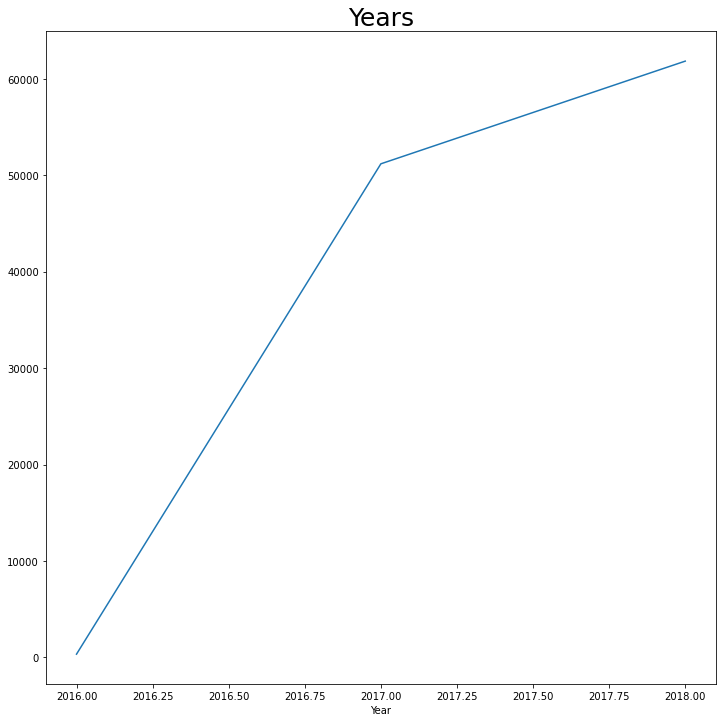

In [7]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby('Year').size().plot(
    kind = 'line',
    figsize=(12,12)
)
plt.title('Years',fontsize=25)

Text(0.5, 1.0, 'Months')

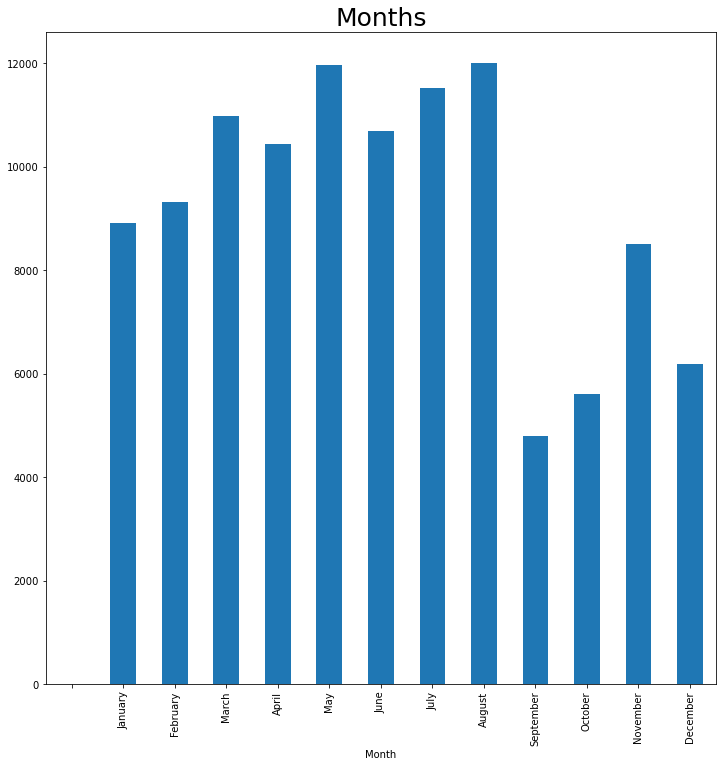

In [9]:
df['Month'] =  pd.Series(pd.Categorical(df['order_purchase_timestamp'].dt.month_name(), categories=list(calendar.month_name)))
df['Month']
df.groupby('Month').size().plot(
    kind = 'bar',
    figsize=(12,12)
)
plt.title('Months',fontsize=25)

Text(0.5, 1.0, 'Months')

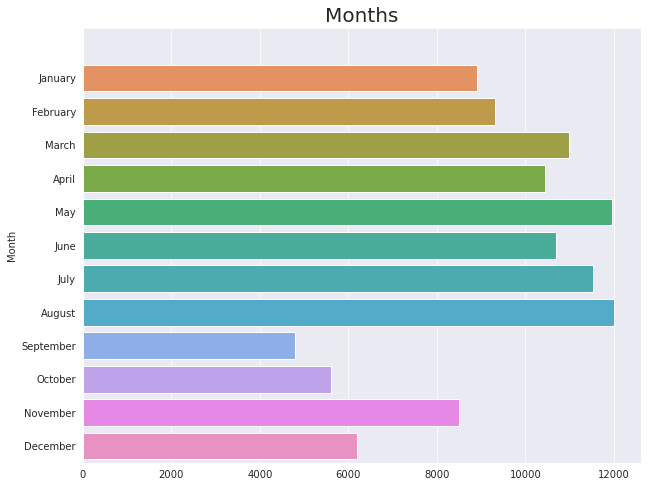

In [10]:
month = df.groupby('Month').size().sort_values()
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=month.index, x=month.values)
plt.title('Months',fontsize=20)

In [2]:
df.groupby('MonthY').size().sort_values().plot(
    kind = 'bar',
    figsize=(8,5)
)

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Month_Year')

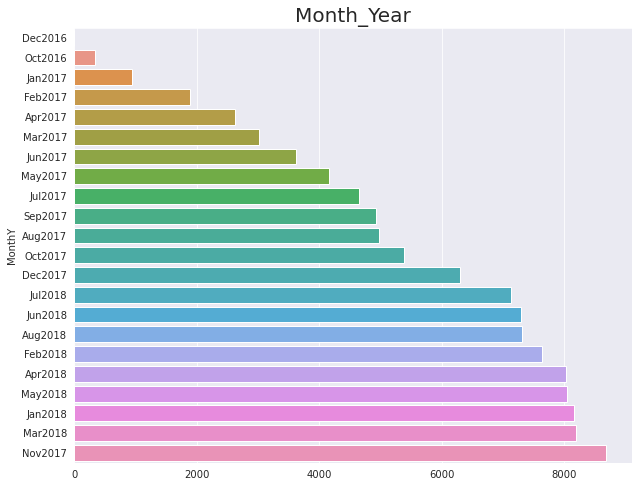

In [13]:
Month_Year = df.groupby('MonthY').size().sort_values()

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=Month_Year.index, x=Month_Year.values)
plt.title('Month_Year',fontsize=20)

Text(0.5, 1.0, 'Days')

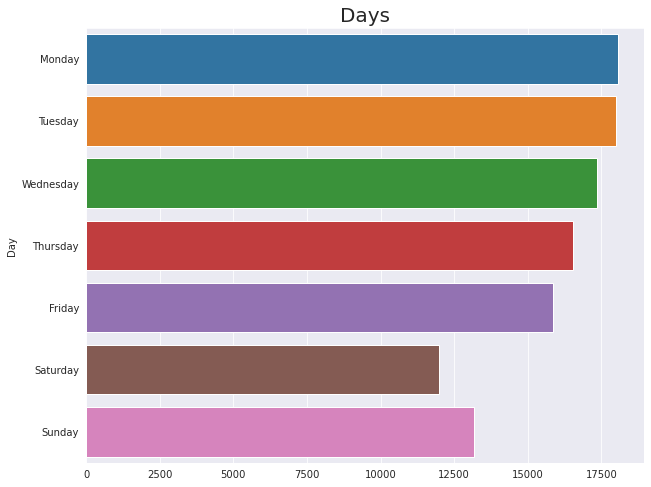

In [15]:
 day = df.groupby('Day').size().sort_values()

 fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=day.index, x=day.values)
plt.title('Days',fontsize=20)

Text(0.5, 1.0, 'Top 10 product category')

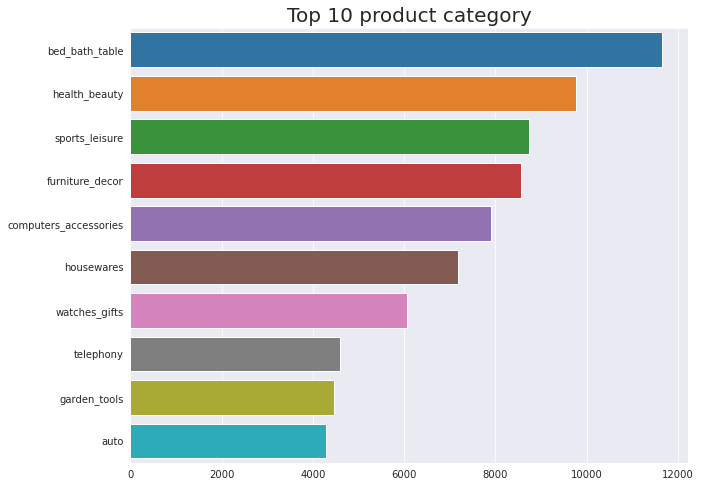

In [16]:
top_10_category = df["product_category_name_english"].value_counts().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=top_10_category.index, x=top_10_category.values)
plt.title('Top 10 product category',fontsize=20)

Text(0.5, 1.0, 'average_price')

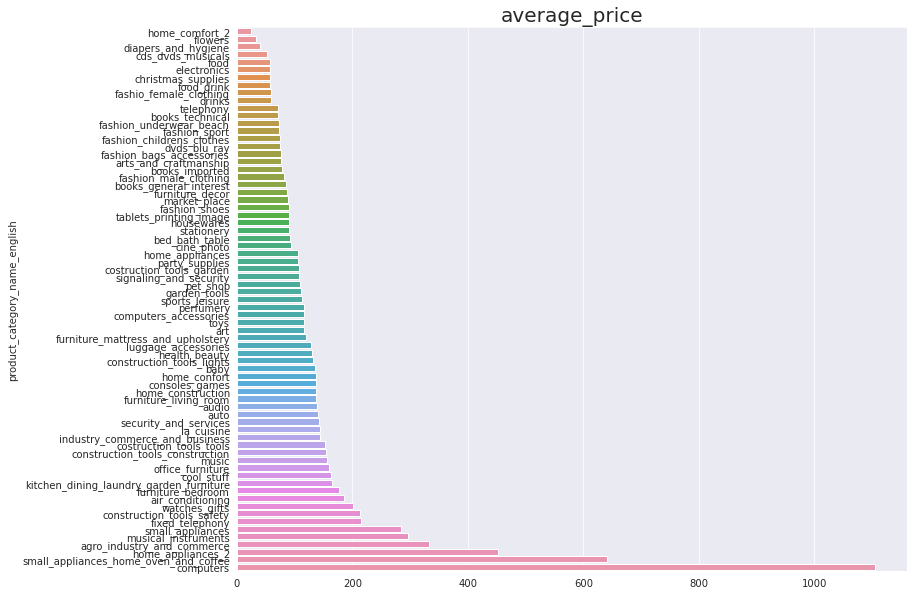

In [18]:
average_price = df.groupby("product_category_name_english")["price"].agg(np.mean).sort_values()
average_price 
fig=plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.barplot(y=average_price.index, x=average_price.values)
plt.title('average_price',fontsize=20)

In [20]:
top_category = df[df['product_category_name_english'].isin(top_10_category.index)]
price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False), 2)
price_top_category


product_category_name_english
watches_gifts            200.09
auto                     140.76
health_beauty            130.25
computers_accessories    116.35
sports_leisure           113.44
garden_tools             110.30
bed_bath_table            92.53
housewares                90.38
furniture_decor           87.19
telephony                 70.73
Name: price, dtype: float64

Text(0.5, 1.0, 'average_price')

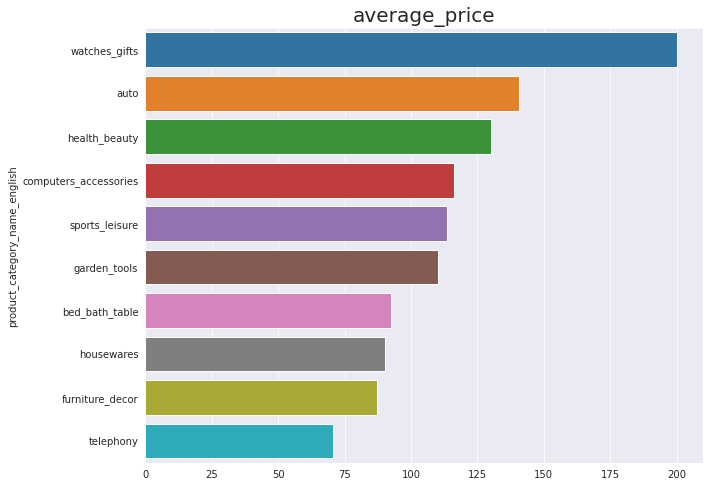

In [21]:
fig=plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(y=price_top_category.index, x=price_top_category.values)
plt.title('average_price',fontsize=20)

Text(0.5, 1.0, 'Average Price')

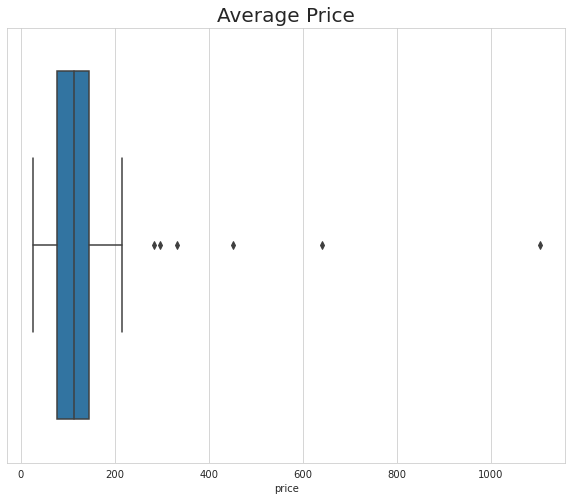

In [22]:

fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=average_price)
plt.title('Average Price',fontsize=20)

Text(0.5, 1.0, 'Top Categories Average Price')

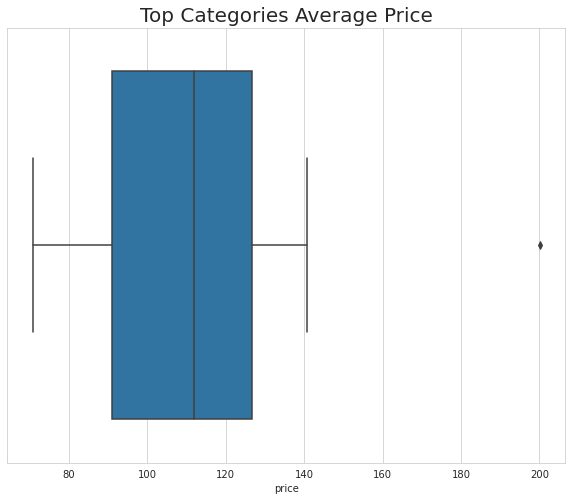

In [23]:
fig=plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=price_top_category)
plt.title('Top Categories Average Price',fontsize=20)

In [24]:
df.payment_type.sample(15)

30997         boleto
75195    credit_card
48151    credit_card
36194    credit_card
28143    credit_card
91816    credit_card
92782    credit_card
56618        voucher
11151    credit_card
82114    credit_card
34152    credit_card
43246         boleto
33033    credit_card
59654    credit_card
80838    credit_card
Name: payment_type, dtype: object

In [25]:
df.payment_type.nunique()

4

In [26]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

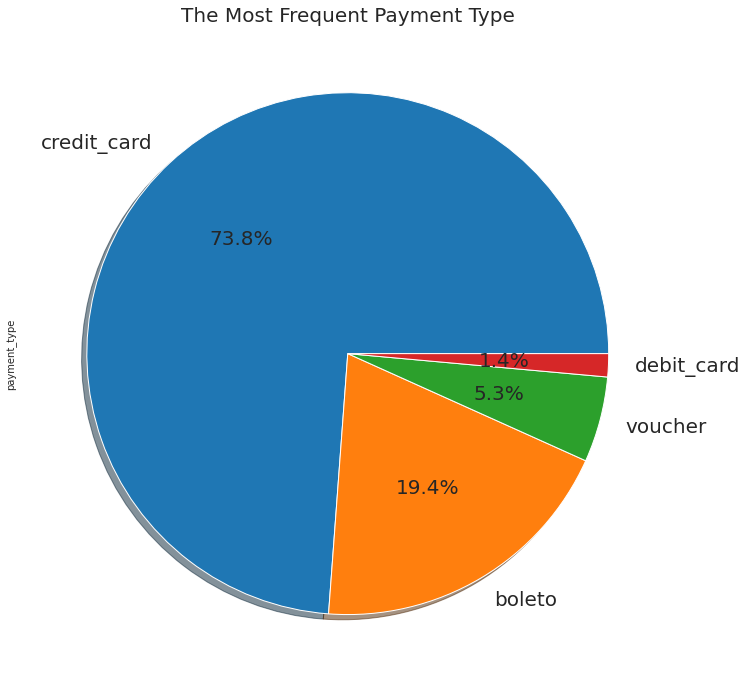

In [27]:
df["payment_type"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

Text(0.5, 1.0, 'states')

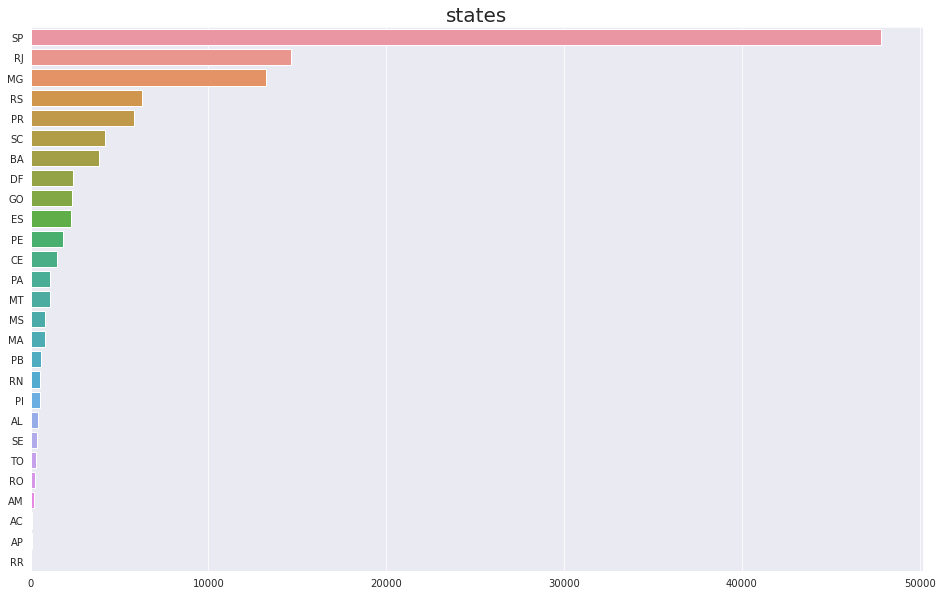

In [30]:
fig=plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('states',fontsize=20)

In [33]:
round(df['freight_value'].corr(df['price']), 2)

0.41

In [35]:
round(df['freight_value'].corr(df['product_weight_g']), 2)

0.61

In [38]:
round(df['freight_value'].cov(df['price']), 2)

1194.35

In [39]:
round(df['freight_value'].cov(df['product_weight_g']), 2)

36383.97